# Interpretabilidad sobre la insuficiencia cardiaca

Con este estudio de interpretabilidad de los problemas cardíacos se pretende que el usuario final pueda comprender las tareas principales que afectan los resultados de estos problemas, explicando las decisiones que toma un algoritmo.

## ¿Qué es la interpretabilidad?

La interpretabilidad significa dar explicaciones a los usuarios finales para una decisión o proceso en particular. Más específicamente, implica:

 - Comprender las tareas principales que afectan los resultados.
 - Explicar las decisiones que toma un algoritmo.
 - Conocer los patrones / reglas / características que se aprenden mediante un algoritmo. Ser crítico con los resultados.
 - Explorar las incógnitas desconocidas para su algoritmo.
 
No se trata de comprender cada detalle sobre cómo funciona un modelo para cada punto de datos en los datos de entrenamiento.<br> 
Si se desea saber mas en profuncidad sobre la interpretablididad se recomienda esta página web [Interpretabilidad](https://sitiobigdata.com/2019/12/24/interpretabilidad-en-aprendizaje-automatico/)

![title](https://images.unsplash.com/photo-1526628953301-3e589a6a8b74?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1406&q=80)

## Técnicas de interpretabilidad en modelos de ML

Vamos a discutir algunas técnicas que ayudan a extraer las ideas anteriores de un modelo. Estas técnicas, en el orden en que se discuten, son las siguientes:

<div class="alert alert-block alert-info">

<h4>ELI5 library</h3>
<h4>Partial Dependence Plots</h3>
<h4>Skater Model Interpretation</h3>
<h4>LIME</h3>
<h4>SHAP Values</h3>
<h4>SHAP Summary Plots</h3>
<h4>FairML</h3>
</div>


## Objetivo

El objetivo de este estudio es utilizar técnicas para explicar cómo las diferentes características tienen un efecto diferente en la predicción de si un paciente tiene o no enfermedades del corazón, basándose en ciertas medidas de diagnóstico.


## Conjunto de datos

El conjuntos de datos consta de varias variables médicas predictoras y una variable objetivo, el resultado. <br> En este caso se cuenta con datos extraídos de sitio web Kaggle, donde a través de esta url [Datos de Predicción de insuficiencia cardíaca](https://www.kaggle.com/fedesoriano/heart-failure-prediction), se han podido adquirir la información necesaria para desarrollar este análisis, contando con 918 personas con 11 características médicas sobre ellos.

### Variables
- Rasgo 1: **Edad:** edad del paciente [años]
- Rasgo 2: **Sexo:** sexo del paciente [M: Masculino, F: Femenino]
- Rasgo 3: **ChestPainType:** tipo de dolor torácico [TA: angina típica, ATA: angina atípica, NAP: dolor no anginoso, ASY: asintomático]
- Rasgo 4: **PA en reposo:** presión arterial en reposo [mm Hg]
- Rasgo 5: **Colesterol:** colesterol sérico [mm/dl]
- Rasgo 6: **BS en ayunas:** azúcar en sangre en ayunas [1: si BS en ayunas > 120 mg/dl, 0: en caso contrario]
- Rasgo 7: **ECG en reposo:** resultados del electrocardiograma en reposo [Normal: normal, ST: con anomalías en la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV), HVI: hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes]
- Rasgo 8: **MaxHR:** frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]
- Rasgo 9: **ExerciseAngina:** angina inducida por el ejercicio [Y: Sí, N: No]
- Rasgo 10: **Oldpeak:** oldpeak = ST [Valor numérico medido en depresión]
- Rasgo 11: **ST_Slope:** la pendiente del segmento ST del ejercicio máximo [Arriba: pendiente ascendente, Plana: plana, Abajo: pendiente descendente]
- Rasgo 12: **Enfermedad cardíaca:** clase de salida [1: enfermedad cardíaca, 0: normal]

## Importando librerías de Python

In [1]:
### Bibliotecas básicas de gestión de datos
import pandas as pd
import numpy as np

### Bibliotecas gráficas
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Utilidades Scikit-learn 
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

### Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

### Modelos
from xgboost import XGBClassifier, plot_importance

########################################################
### Para un flujo de trabajo más rápido, las bibliotecas de Interpretabilidad
### se instalarán/cargarán sobre la marcha del tutorial
########################################################

### Add-ons adicionales
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Carga del dataset en un dataframe
df = pd.read_csv('../datos/heart.csv')

In [3]:
df.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})

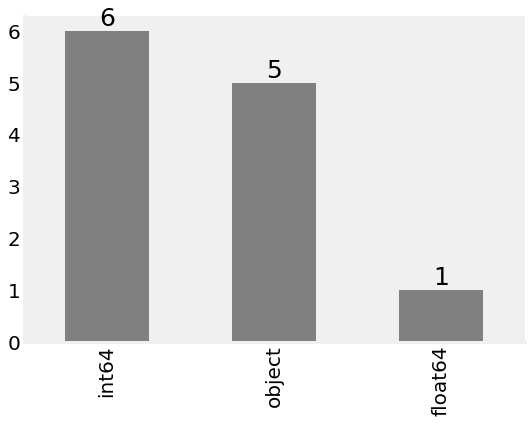

In [4]:
# Comprobación del tipo de datos de las características
plt.figure(figsize = (8,6))
ax = df.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 0.1, height, ha = 'center', size = 25)
sns.despine()

In [5]:
# Estadísticas descriptivas
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [6]:
# Haremos por seguridad una copia del marco de datos original antes de su procesamiento posterior 
heart_failure = df.copy()

In [7]:
# Comprobación del desequilibrio del objetivo
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Heart Disease']
values = df['HeartDisease'].value_counts()/df['HeartDisease'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Heart Disease",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

> Como se puede apreciar en la figura anterior, la variable objetivo está equlibrada

### Técnicas pre-modelo. Análisis y visualización de datos

El análisis y la visualización de los datos de exploración son las primeras herramientas para interpretar y obtener conocimientos latentes de los datos. Nos ayudan a identificar las características clave y las representaciones significativas, incluso con grandes conjuntos de datos con, por ejemplo, técnicas de reducción de la dimensionalidad (PCA, t-SNE, etc.). 

Las técnicas de interpretabilidad previas al modelo son independientes del modelo, ya que sólo son aplicables a los propios datos. La interpretabilidad pre-modelo suele producirse antes de la selección del modelo, ya que también es importante explorar y tener una buena comprensión de los datos antes de pensar en el modelo. Las características intuitivas significativas y la escasez (bajo número de características) son algunas propiedades que ayudan a lograr la interpretabilidad de los datos.

Así que ahora vamos a hacer un rápido análisis de datos de exploración para ver cómo se distribuyen y correlacionan los datos.

In [8]:
# Extrayendo nuestra variable objetivo 'HeartDisease'
# y creando una lista de características útiles de las variables dependientes
target = 'HeartDisease'
features_list = list(heart_failure.columns)
features_list.remove(target)
print(features_list)

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


### Análisis univariante 

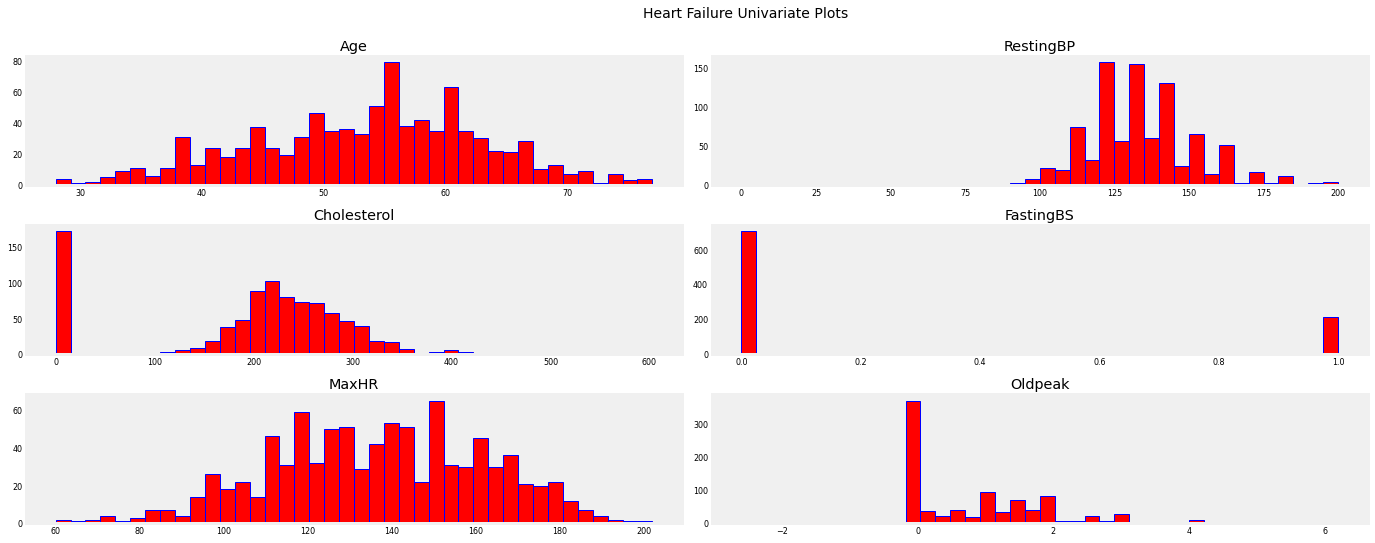

In [9]:
heart_failure[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Heart Failure Univariate Plots', x=0.65, y=1.25, fontsize=14);

El gráfico muestra que algunas características, como el cholesterol, presentan un pico de valores en 0, que no es un valor admisible para esas características. Así que, probablemente, esos valores se han insertado donde faltaba el valor correspondiente.

Comprobemos cuántos valores 0 hay en el conjunto de datos:

In [10]:
df.drop( "HeartDisease", axis=1 ).isin( [ 0 ] ).sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS         704
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
dtype: int64

Podemos ver que, aparte de Age, Sex, ChestPainType, RestingECG, MaxHR, ExerciseAngina y ST_Slope, todas las demás columnas tienen valores 0. Entre ellas, las únicas que podrían tener valores 0 admisibles es FastingBS y RestingBP. Por lo tanto, consideraré todos los demás valores como ausentes y tendré que tratarlos en la fase de preprocesamiento.

En el caso de OldPeak, desconozco sus valores normales, por lo que sus valores en 0 se tomarán como válidos.

Por ahora, me limitaré a anotar las columnas que presentan valores perdidos y las sustituiré por valores medios de cada columna, para evitar suposiciones erróneas y gráficos sesgados en el siguiente análisis:

In [11]:
columns_with_missing_values = ["Cholesterol"]

for col in columns_with_missing_values:
    heart_failure[ col ] = heart_failure[ col ].replace( to_replace=0, value=np.mean(heart_failure [col] ))
    
print(heart_failure)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140        289.0          0     Normal   
1     49   F           NAP        160        180.0          0     Normal   
2     37   M           ATA        130        283.0          0         ST   
3     48   F           ASY        138        214.0          0     Normal   
4     54   M           NAP        150        195.0          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110        264.0          0     Normal   
914   68   M           ASY        144        193.0          1     Normal   
915   57   M           ASY        130        131.0          0     Normal   
916   57   F           ATA        130        236.0          0        LVH   
917   38   M           NAP        138        175.0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

> Comprobemos cómo han cambiado los histogramas tras la sustitución:

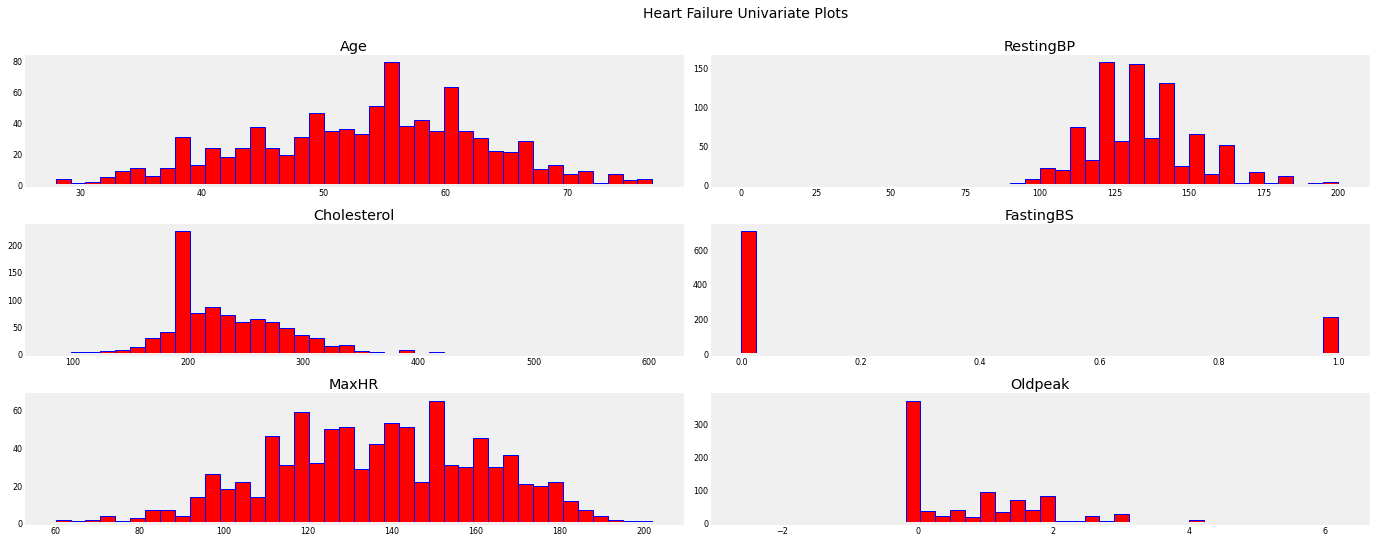

In [12]:
heart_failure[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Heart Failure Univariate Plots', x=0.65, y=1.25, fontsize=14);  

### Codificación

> Los algoritmos de machine learning normalmente sólo pueden tener valores numéricos como variables de predicción. Por lo tanto, la codificación de etiquetas es necesaria, ya que codifican las etiquetas categóricas con valores numéricos. Para evitar la introducción de la importancia de las características categóricas con un gran número de valores únicos, utilizaremos tanto la codificación de etiquetas como la codificación de un solo valor, como se muestra a continuación.

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Se crea un objeto codificador de etiquetas
le = LabelEncoder()

In [14]:
# La codificación de etiquetas se utilizará para las columnas con 2 o menos valores únicos
le_count = 0
for col in heart_failure.columns[1:]:
    if heart_failure[col].dtype == 'object':
        if len(list(heart_failure[col].unique())) <= 2:
            le.fit(heart_failure[col])
            heart_failure[col] = le.transform(heart_failure[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [15]:
print(heart_failure.shape)
heart_failure.head()

(918, 12)


Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    1           ATA        140        289.0          0     Normal   
1   49    0           NAP        160        180.0          0     Normal   
2   37    1           ATA        130        283.0          0         ST   
3   48    0           ASY        138        214.0          0     Normal   
4   54    1           NAP        150        195.0          0     Normal   

   MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172               0      0.0       Up             0  
1    156               0      1.0     Flat             1  
2     98               0      0.0       Up             0  
3    108               1      1.5     Flat             1  
4    122               0      0.0       Up             0

In [16]:
# Se convierte el resto de la variable categórica en dummy
heart_failure = pd.get_dummies(heart_failure, drop_first=True)
df = pd.get_dummies(df, drop_first=True)

> El resultado del conjunto de datos tiene ahora 16 columnas para 918 personas analizadas.

In [17]:
print(heart_failure.shape)
heart_failure.head()

(918, 16)


Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140        289.0          0    172               0   
1   49    0        160        180.0          0    156               0   
2   37    1        130        283.0          0     98               0   
3   48    0        138        214.0          0    108               1   
4   54    1        150        195.0          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0             0                  1                  0   
1      1.0             1                  0                  1   
2      0.0             0                  1                  0   
3      1.5             1                  0                  0   
4      0.0             0                  0                  1   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  \
0                 0                  1              0              0   
1                 0                  1              0              1   
2                 0                  0              1              0   
3                 0                  1              0              1   
4                 0                  1              0              0   

   ST_Slope_Up  
0            1  
1            0  
2            1  
3            0  
4            1

In [18]:
# Extrayendo nuestra variable objetivo 'HeartDisease'
# Creando una lista de características útiles de las variables dependientes de nuevo para la nueva CODIFICACIÓN
target = 'HeartDisease'
features_list = list(heart_failure.columns)
features_list.remove(target)
print(features_list)

['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up']


### Análisis multivariante

Text(0.5, 1.0, 'Correlation Plot')

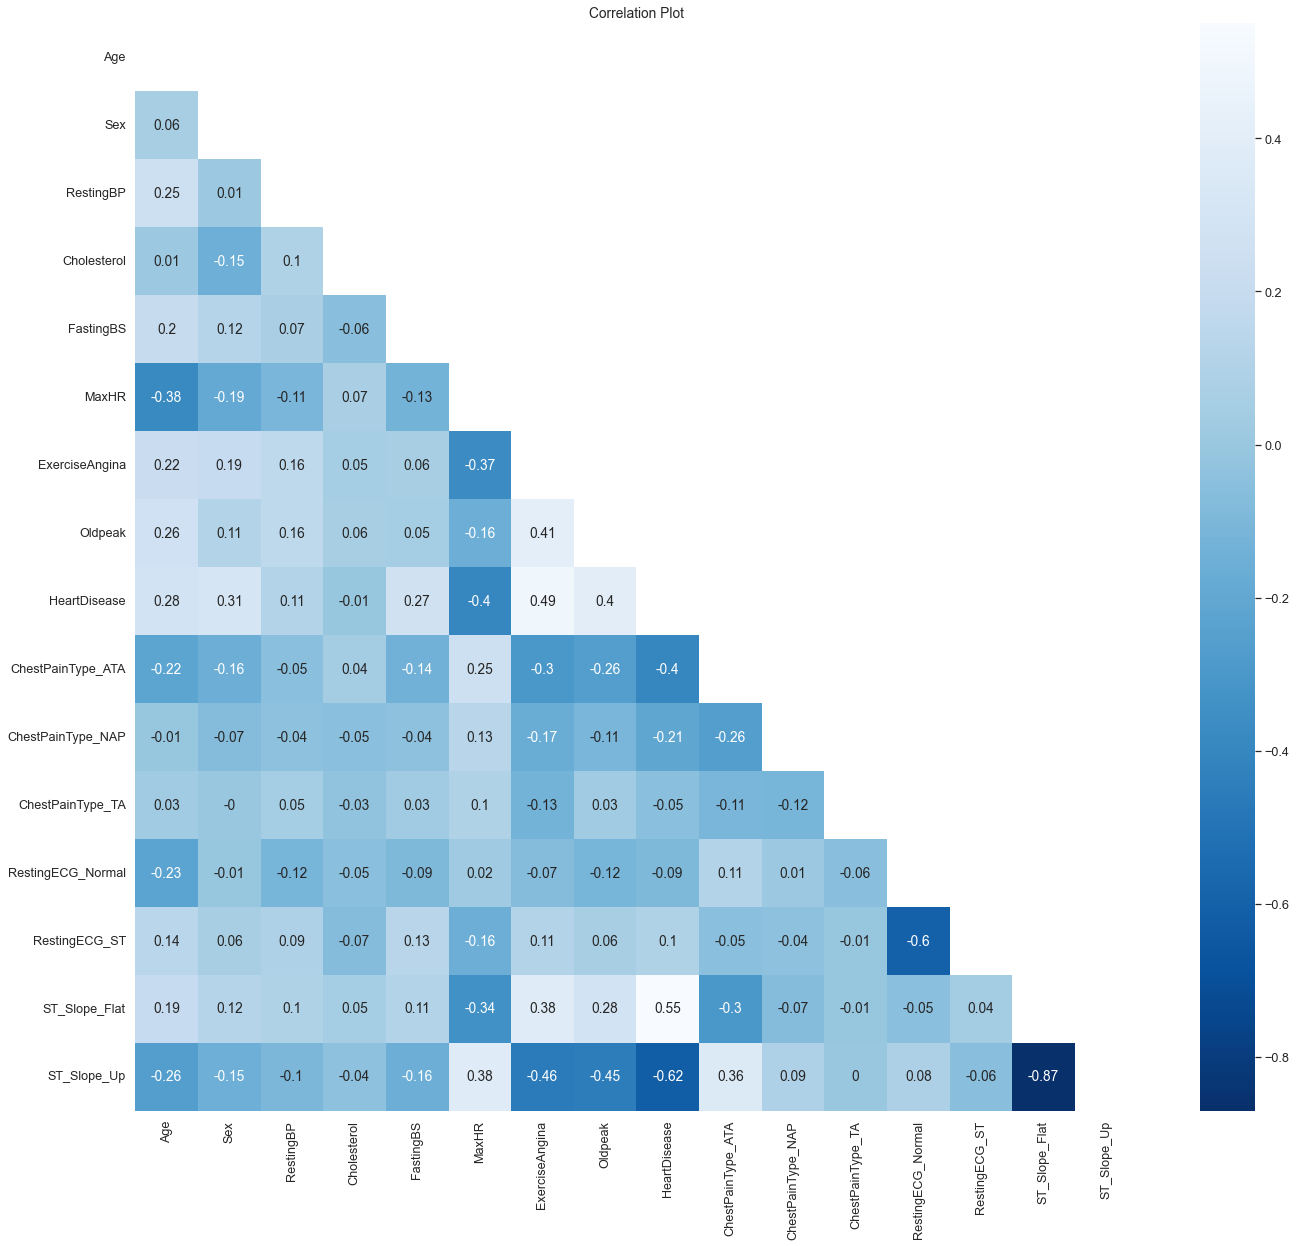

In [19]:
corr=heart_failure.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(20, 20))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='Blues_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

A partir de la matriz de correlación podemos ver que la enfermedad cardíaca y ST_Slope_Up y ST_Slope_Flat están altamente correlacionadas, pero a parte, hay algunas características que también parecen tener algún tipo de relación como sugiere el valor del índice de correlación alrededor de 0,5.

Estas características son:

- RestingECG_ST - RestingECG_Normal: esto es razonable ya que son valores numéticos que provienen de la misma característica.
- ExerciseAngina - ST_Slope_Up: podemos deducir que una pendiente en el sg segment upsloping y tener angina por ejercicio están relacionados.
- OldPeak - ST_Slope_Up: podemos deducir que una pendiente en el sg segment upsloping y el oldpeak están relacionados también.

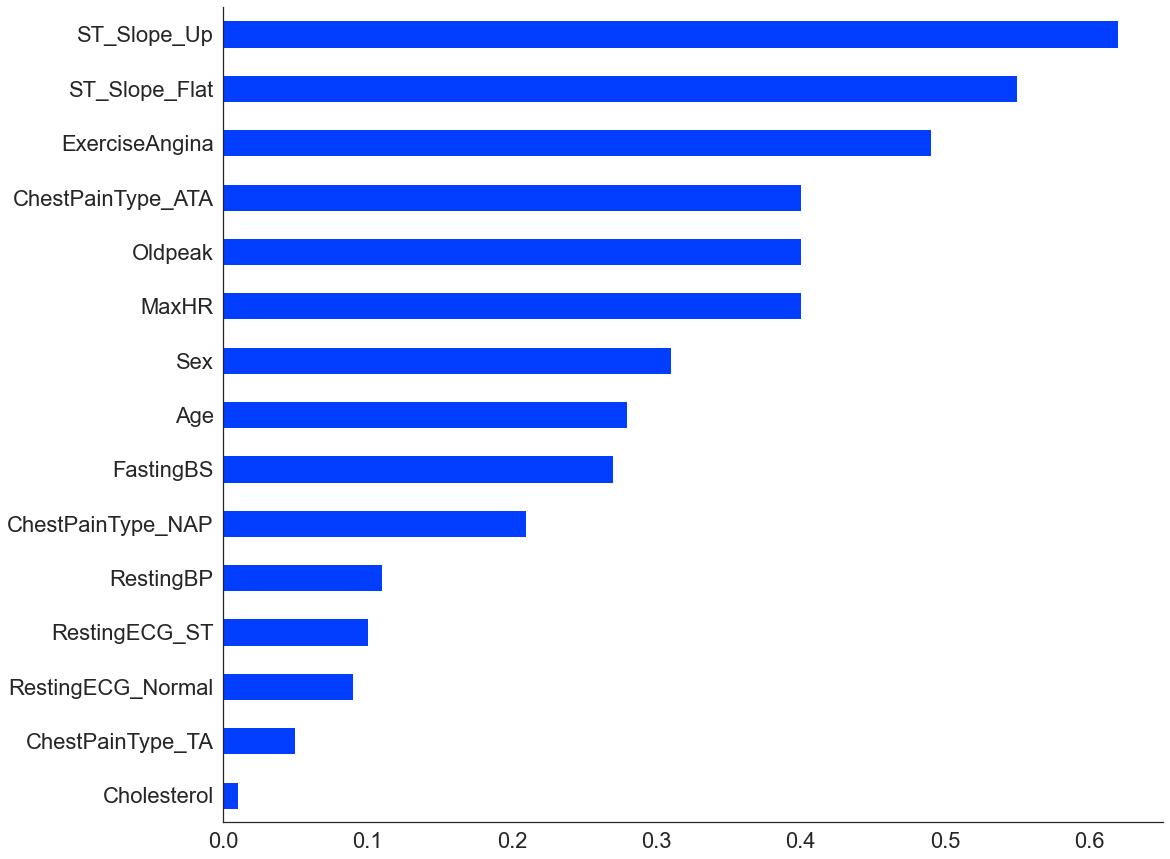

In [20]:
sns.set(font_scale=2)
plt.figure(figsize=(15, 15))
sns.set_style("white")
sns.set_palette("bright")
abs(corr['HeartDisease']).sort_values()[:-1].plot.barh()
plt.gca().set_facecolor('#FFFFFF')
sns.despine()

>Como era de esperar, el gráfico confirma lo que hemos descubierto mirando la matriz de correlación: parece haber una relación lineal positiva entre las características mencionadas anteriormente.

### Creamos los conjuntos de entrenamiento y test

In [21]:
# Crear el objetivo y la columna de características y dividir el conjunto de datos en conjunto de prueba y de entrenamiento.

#X = heart_failure.iloc[:, :-1]
#y = heart_failure.iloc[:, -1]

X = heart_failure.iloc[:, [0,1,2,3,4,5,6,7,9,10,11,12,13,14,15]]
y = heart_failure.iloc[:, 8]

# 75% para entrenamiento, 25% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((688, 15), (230, 15))

### Modelos de Machine Learning
![title](https://www.researchgate.net/profile/Javier-Del-Ser/publication/338184751/figure/fig7/AS:841880166223884@1577731281844/Trade-off-between-model-interpretability-and-performance-and-a-representation-of-the.png)

### Entrenamos nuestro modelo

Ahora vamos a instanciar y a entrenar un modelo de clasificación XGBoost (baja interpretabilidad) con nuestros datos de entrenamiento.

Un modelo Gradient Boosting está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

In [22]:
%%time

# ML en dos líneas ;-)
# eval_metric = 'logloss' 
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train, eval_metric = 'logloss')

Wall time: 247 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=33,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluación del rendimiento del modelo

In [23]:
# Realización de predicciones sobre los datos de las pruebas y evaluación del rendimiento
xgb_predictions = xgb.predict(X_test)

In [24]:
# Diseñamos una función de evaluación de clasificación simple
def evaluation_scores(test, prediction, target_names=None):
    print('Precisión:', np.round(metrics.accuracy_score(test, prediction), 4)) 
    print('-'*60)
    print('Informe de clasificación:\n\n', metrics.classification_report(y_true=test, y_pred=prediction, target_names=target_names)) 
    
    classes = [0, 1]
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=test, y_pred=prediction, labels=classes)
#    cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels), index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))    
    print('-'*60)
    print('Matriz de confusión:\n')
    print(cm) 

In [25]:
# Evaluamos las predicciones
evaluation_scores(y_test, xgb_predictions, target_names=['HeartDisease(No)', 'HeartDisease(Sí)'])

Precisión: 0.8478
------------------------------------------------------------
Informe de clasificación:

                   precision    recall  f1-score   support

HeartDisease(No)       0.81      0.80      0.81        92
HeartDisease(Sí)       0.87      0.88      0.87       138

        accuracy                           0.85       230
       macro avg       0.84      0.84      0.84       230
    weighted avg       0.85      0.85      0.85       230

------------------------------------------------------------
Matriz de confusión:

[[ 74  18]
 [ 17 121]]


### Clasificación: ROC y AUC

Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:

- Tasa de verdaderos positivos
- Tasa de falsos positivos

https://stackabuse.com/understanding-roc-curves-with-python/

La curva AUC / ROC es probablemente una mejor evaluación para esta tarea de clasificación:

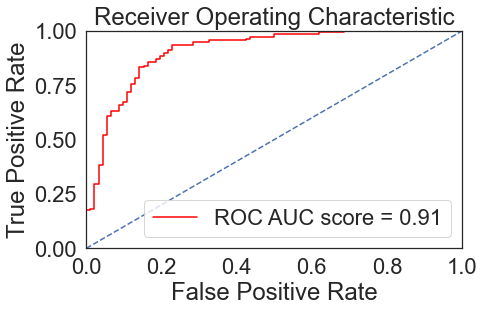

In [26]:
# calcular el FPR y el TPR para todos los umbrales de la clasificación
probs = xgb.predict_proba(X_test)
# Probabilidades positivas
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'red', label = 'ROC AUC score = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

El AUC proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. 

AUC = 0,91 bueno, no está mal sin ningún tipo de ajuste o ingeniería de características.

Necesitamos un análisis más sofistificado que la simple precisión... Interpretabilidad

## Métodos de interpretación

Los modelos no paramétricos, como los modelos basados en árboles como XGBoost, son más difíciles de interpretar porque su número total de parámetros no es fijo y crecerá con el volumen de datos utilizados para el entrenamiento. Los modelos paramétricos (por ejemplo, la regresión logística) ofrecen, por el contrario, un primer nivel de interpretación a través de sus coeficientes (pero, de hecho, ni siquiera esto es completamente trivial). En ese caso, las técnicas de regularización como L1-regularización/LASSO pueden ser útiles para reducir el espacio de características y mejorar la interpretabilidad del modelo. Para los modelos no paramétricos, afortunadamente, muchos de ellos, como XGBoost, dan acceso a métodos de interpretación como la importancia de las características para ayudarnos a entender la evaluación interna del modelo para hacer sus predicciones.

Para interpretar un modelo, básicamente necesitamos saber

- Qué características son las más importantes en el modelo
- El efecto de cada característica en una predicción concreta
- Los efectos de cada característica en un gran número de predicciones

Los cálculos nativos de la importancia global de las características que vienen con XGBoostare se basan en los siguientes parámetros:

- Peso de las características: se basa en el número de veces que una característica aparece en un árbol en el conjunto de árboles
- Cobertura: la cobertura media (número de muestras afectadas) de las divisiones que utilizan la característica
- Ganancia: la ganancia media de las divisiones que utilizan la característica

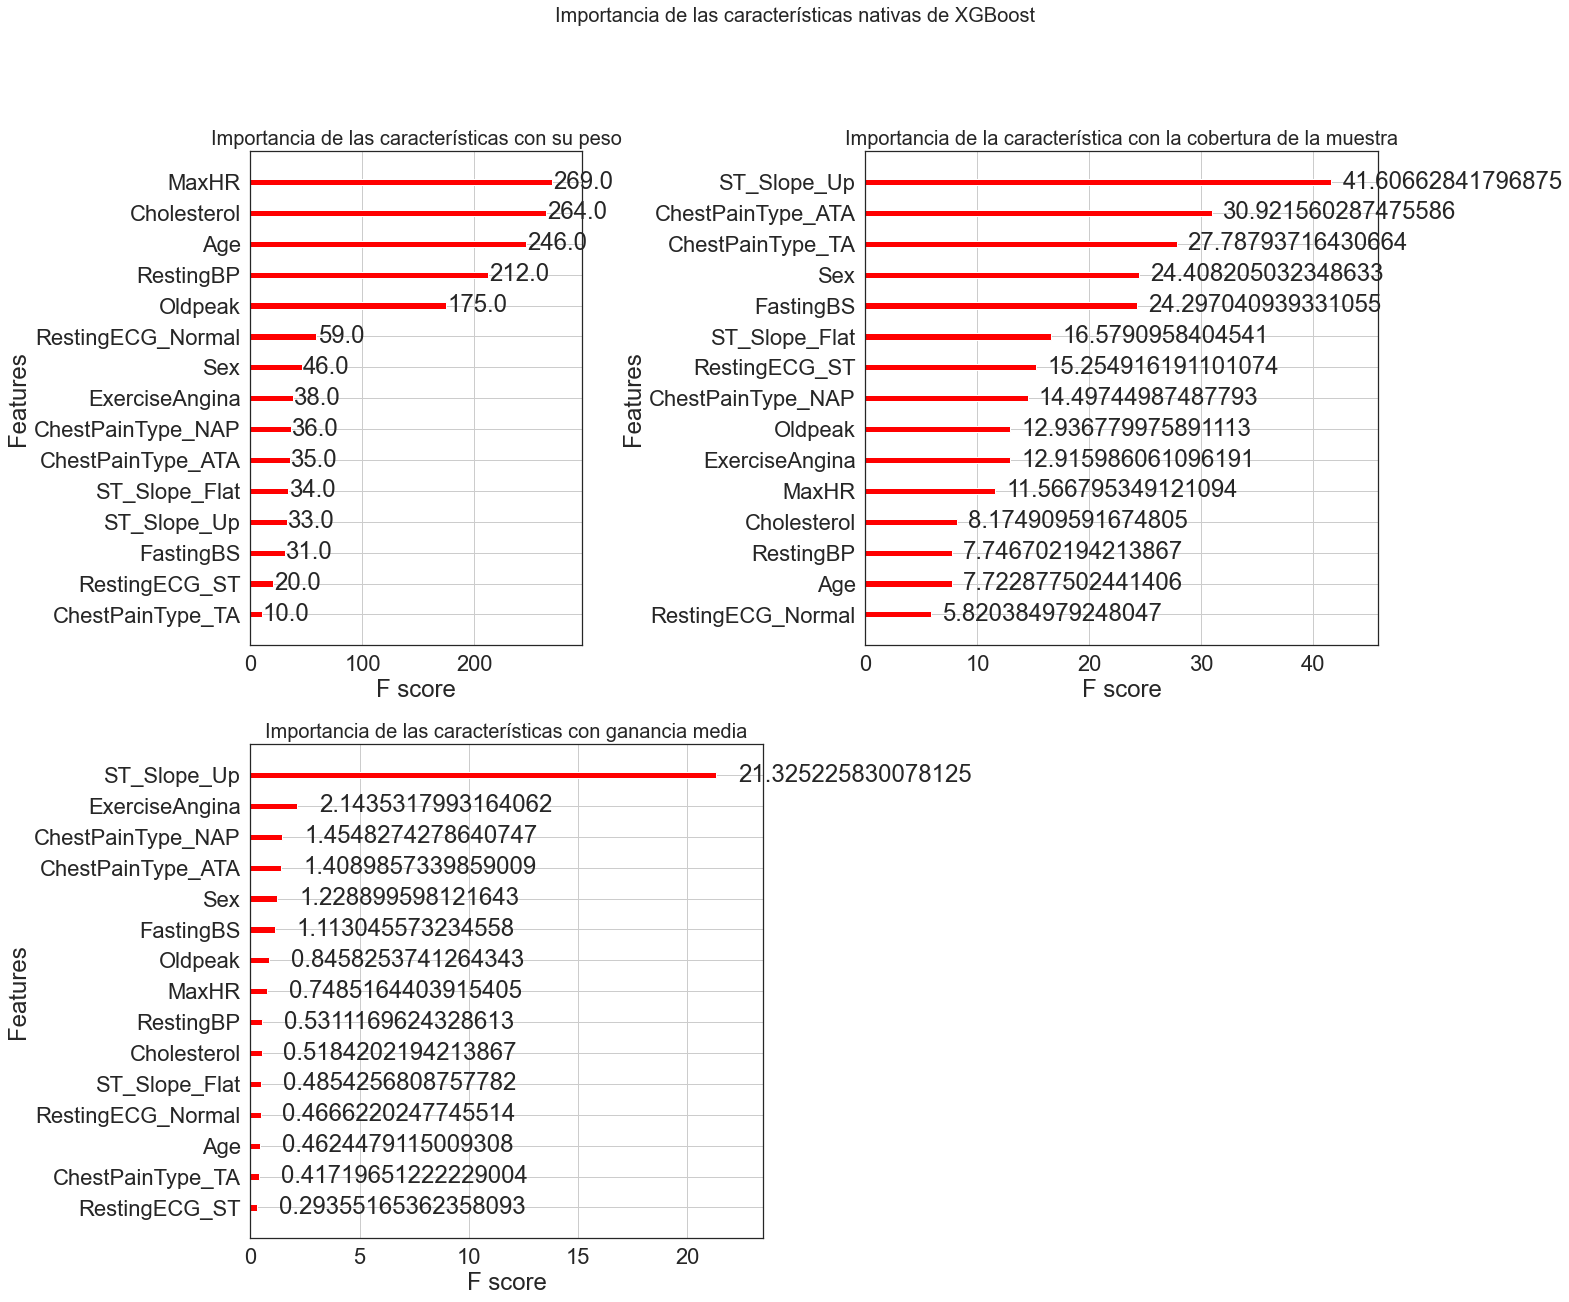

In [27]:
# Trazando la importancia de las características de XGBoost
fig = plt.figure(figsize = (18, 20))
title = fig.suptitle("Importancia de las características nativas de XGBoost", fontsize=20)

ax1 = fig.add_subplot(2, 3, 1)
plot_importance(xgb, importance_type='weight', ax=ax1, color='red')
ax1.set_title("Importancia de las características con su peso", fontsize=20);

ax2 = fig.add_subplot(2, 2, 2)
plot_importance(xgb, importance_type='cover', ax=ax2, color='red')
ax2.set_title("Importancia de la característica con la cobertura de la muestra", fontsize=20);

ax3 = fig.add_subplot(2, 2, 3)
plot_importance(xgb, importance_type='gain', ax=ax3, color='red')
ax3.set_title("Importancia de las características con ganancia media", fontsize=20);

Como se ve, los rasgos se ordenan de distintas maneras según estos diferentes criterios. Necesitamos una forma más coherente de hacerlo. Como veremos más adelante, los valores de Shapley, por ejemplo, nos ofrecen esa forma consistente

### ELI5 Model Interpretation

Según su documentación, ELI5 ("Explain Like I'm 5") es una librería de Python que ayuda a depurar clasificadores y regresores de aprendizaje automático y a explicar sus predicciones de forma fácil de entender e intuitiva. ELI5 es un buen punto de partida y soporta modelos basados en árboles y paramétricos/lineales y también utilidades de procesamiento de texto y HashingVectorizer de scikit-learn, pero no soporta verdaderas interpretaciones agnósticas del modelo.

¿Qué características considera importantes el modelo? ¿Qué características pueden tener un mayor impacto en las predicciones del modelo que las demás? Este concepto se denomina importancia de las características y la Importancia es una técnica muy utilizada que nos ayuda a ver cuando nuestro modelo produce resultados contraintuitivos, y ayuda a mostrar a los demás cuando nuestro modelo está funcionando como esperamos.

La Importancia de Permutación funciona para muchos estimadores de scikit-learn. La idea es simple: Permutar o barajar aleatoriamente una sola columna en el conjunto de datos de validación dejando todas las demás columnas intactas. Una característica se considera "importante" si la precisión del modelo disminuye mucho y provoca un aumento del error. Por otro lado, una característica se considera "no importante" si el hecho de barajar sus valores no afecta a la precisión del modelo.

La importancia de la permutación es útil para depurar, entender su modelo y comunicar una visión general de alto nivel de su modelo.

La importancia de la permutación se calcula después de que el modelo haya sido ajustado.

La importancia de la permutación se calcula utilizando la biblioteca ELI5. ELI5] (https://github.com/TeamHG-Memex/eli5) es una biblioteca de Python que permite visualizar y depurar varios modelos de Aprendizaje Automático utilizando una API unificada. Tiene soporte incorporado para varios marcos de ML y proporciona una manera de explicar los modelos de caja negra.

In [28]:
# pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

Con XGBoost, ELI5 se limita a utilizar los mismos métodos nativos de cálculo de las importancias de las características (con el parámetro "gain" por defecto) que acabamos de ver anteriormente y nos da una forma fácil y ergonómica de mostrarlo con el método eli5.show_weights.

In [29]:
eli5.show_weights(xgb.get_booster())

#### Explicación de las decisiones de predicción del modelo con ELI5
Para que las predicciones de los árboles aleatorios sean más interpretables, cada predicción del modelo puede presentarse como una suma de contribuciones de características (más el sesgo), mostrando cómo las características conducen a una predicción particular. ELI5 lo hace mostrando las ponderaciones de cada característica, indicando su influencia en la decisión final de predicción en todos los árboles. Este es un buen paso en la dirección de la interpretación agnóstica del modelo, pero no totalmente agnóstica, como veremos más adelante, utlizando LIME.

In [30]:
%%time

# necesitamos reentrenar un nuevo modelo con arrays
# ya que eli5 tiene un error con Dataframes y XGBoost
# cf. https://github.com/TeamHG-Memex/eli5/pull/261
xgb_array = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb_array.fit(X_train, y_train, eval_metric = 'logloss')

Wall time: 258 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=33,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
#train_x = df.values
#train_y = heart_failure.values
feat_permut = PermutationImportance(xgb_array, random_state=33).fit(X_train, y_train)
eli5.show_weights(feat_permut, feature_names = features_list)

## Partial Dependence Plots (PD plot)
"El gráfico de dependencia parcial (PD plot) muestra el efecto marginal que tienen una o dos características en el resultado predicho de un modelo de aprendizaje automático (J. H. Friedman 200127). Un gráfico de dependencia parcial puede mostrar si la relación entre el objetivo y una característica es lineal, monótona o más compleja". (de la documentación de PDPbox).

En pocas palabras, mientras que la importancia de las características muestra QUÉ variables afectan más a las predicciones, los gráficos de dependencia parcial muestran CÓMO afecta una característica a las predicciones.

In [32]:
# pip install pdpbox=0.2.0
from pdpbox import pdp, get_dataset, info_plots

In [33]:
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    
    # Crear los datos que vamos a trazar
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.show()

> Veamos cómo se comporta la característica 'ST_Slope_Up':

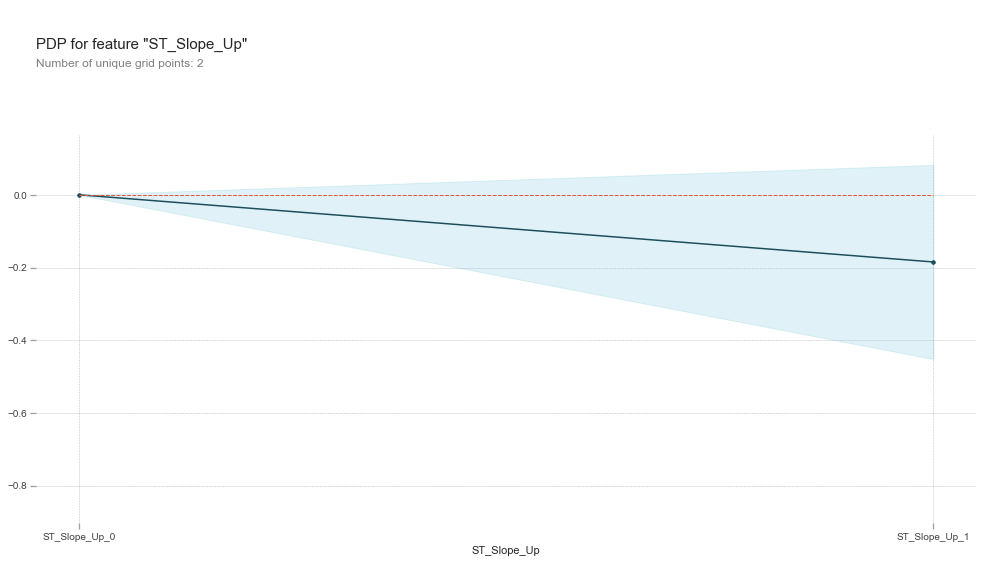

In [34]:
# plot the PD univariate plot
plot_pdp(xgb, X_train, 'ST_Slope_Up')

> Este gráfico PDP nos muestra que la pendiente plana en el segmento ST parece tener una influencia negativa decreciente en la predicción de enfermedades cardíacas para los valores a partir de 0. Después de ese umbral, la influencia decrece de forma lineal.

### Gráfico ICE univariante
Los gráficos ICE son similares a los gráficos PD, pero ofrecen una visión más detallada sobre el comportamiento de los conglomerados casi similares en torno a la curva media del gráfico PD. El algoritmo ICE ofrece al usuario una visión de las diversas variantes de relaciones condicionales estimadas por la caja negra.

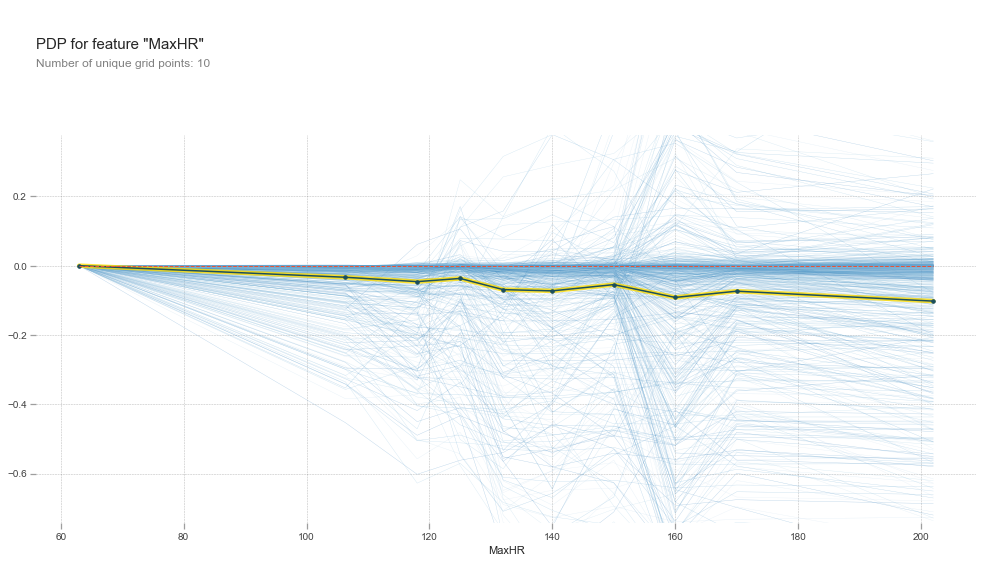

In [35]:
# para el gráfico de ICE debemos especificar el número de clusters de similitud que queremos, 24
plot_pdp(xgb, X_train, 'MaxHR', cluster_flag=False, nb_clusters=24, lines_flag=True)

### Gráfico PD vibariante

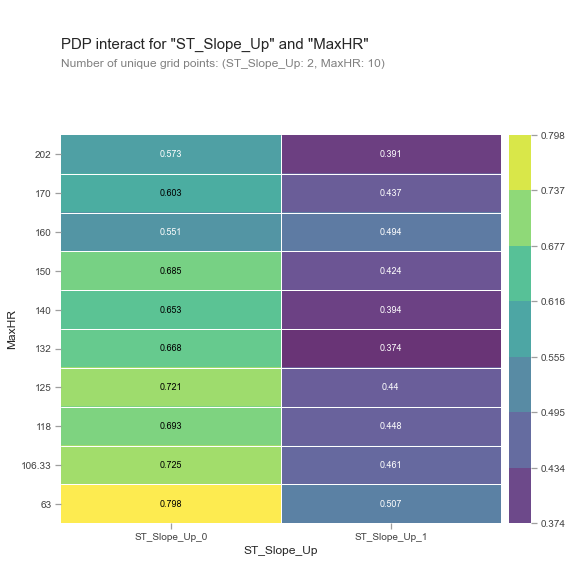

In [37]:
features_to_plot = ['ST_Slope_Up', 'MaxHR']
inter1  =  pdp.pdp_interact(model=xgb, dataset=X_train, model_features=features_list, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')

plt.show()

## Partial Dependence Plots (PD plot)

"El gráfico de dependencia parcial (PD plot) muestra el efecto marginal que tienen una o dos características en el resultado predicho de un modelo de aprendizaje automático (J. H. Friedman 200127). Un gráfico de dependencia parcial puede mostrar si la relación entre el objetivo y una característica es lineal, monótona o más compleja". (de la documentación de PDPbox).

En pocas palabras, mientras que la importancia de las características muestra QUÉ variables afectan más a las predicciones, los gráficos de dependencia parcial muestran CÓMO afecta una característica a las predicciones.

Para más información: https://towardsdatascience.com/introducing-pdpbox-2aa820afd312

![title](https://images.unsplash.com/photo-1485796826113-174aa68fd81b?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80)

## SKATER Model Interpretation

SKATER es un framework MLI relativamente nuevo y la documentación no es fácilmente accesible por ahora. Esta parte está fuertemente inspirada por este artículo y por un extenso y realmente gran tutorial sobre MLI hecho por Dipanjan Sarkar. 

https://towardsdatascience.com/explainable-artificial-intelligence-part-2-model-interpretation-strategies-75d4afa6b739 

"Skater es un marco unificado para permitir la Interpretación de Modelos (post-model) construye un sistema de aprendizaje automático interpretable a menudo necesario para los casos de uso del mundo real utilizando un enfoque agnóstico de modelo. Es una biblioteca de código abierto en python diseñada para desmitificar las estructuras aprendidas de un modelo de caja negra tanto a nivel global (inferencia sobre la base de un conjunto completo de datos) como local (inferencia sobre una predicción individual).

Skater comenzó originalmente como una bifurcación de LIME, pero luego se convirtió en un marco independiente con una amplia variedad de características y capacidades para la interpretación agnóstica de cualquier modelo de caja negra. El proyecto se inició como una idea de investigación para encontrar formas de mejorar la interpretabilidad (preferiblemente humana) de las "cajas negras" predictivas, tanto para los investigadores como para los profesionales".

### Global / Local Interpretations

Los modelos de predicción asignan un espacio de entrada a un espacio de salida. Hay dos tipos de algoritmos de interpretación:

- Algoritmos de interpretación global que ofrecen estadísticas y métricas sobre la distribución conjunta de todo el conjunto de entrenamiento, que generalmente deben reducirse agregando o subconjuntando el espacio de características para que sea "interpretable por el ser humano".
- Algoritmos de interpretación local que sólo se ocupan de regiones del dominio, como la distribución marginal de una característica.

#### Creación de un objeto interpretable

El flujo de trabajo general dentro del paquete skater es crear una interpretación, crear un modelo y ejecutar algoritmos de interpretación. Normalmente, una interpretación consume un conjunto de datos y, opcionalmente, algunos metadatos como nombres de características e ids de filas. Internamente, la Interpretación generará un DataManager para manejar las solicitudes de datos y el muestreo.

- Modelos locales: para crear un modelo skater basado en una función o método local, se pasa la función de predicción a un InMemoryModel. El usuario puede pasar opcionalmente muestras de datos al argumento de la palabra clave examples. Esto sólo se utiliza para inferir los tipos y formatos de salida. Fuera de la caja, skater permite que los modelos devuelvan arrays numpy y dataframes pandas.

- Modelo operacionalizado: Si el modelo es accesible a través de una API, es mejor utilizar un DeployedModel, que envuelve la biblioteca de peticiones. Los DeployedModels requieren dos funciones, un formateador de entrada y un formateador de salida, que se comunican con la biblioteca de peticiones para su publicación y análisis. El formateador de entrada toma un DataFrame de pandas o un ndarray de numpy, y devuelve un objeto (como un dict) que puede ser convertido a JSON para ser publicado. El formateador de salida toma un requests.response como entrada y devuelve un numpy ndarray o pandas DataFrame.

In [38]:
# !conda install -c conda-forge Skater -y
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

### Flujo de trabajo : Objeto de interpretación > Modelo en memoria > Interpretación

In [39]:
interpreter = Interpretation(training_data=X_test.values, feature_names=features_list)
im_model = InMemoryModel(xgb.predict_proba, examples=X_train.values, target_names=['HeartDisease(No)', 'HeartDisease(Sí)'])

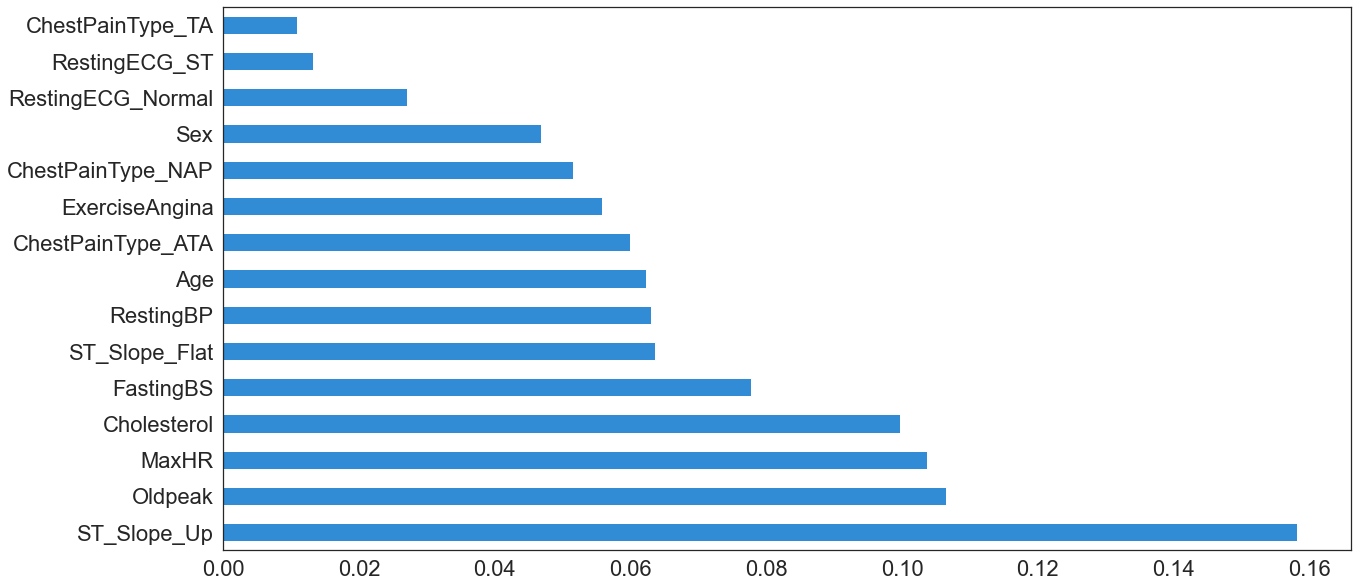

In [40]:
plt.rcParams["figure.figsize"] = (18,10)
plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=False, progressbar=False)

### Gráficos de dependencia parcial con SKATER

2022-01-13 20:00:29,743 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[2/2] grid cells ████████████████████ Time elapsed: 2 seconds

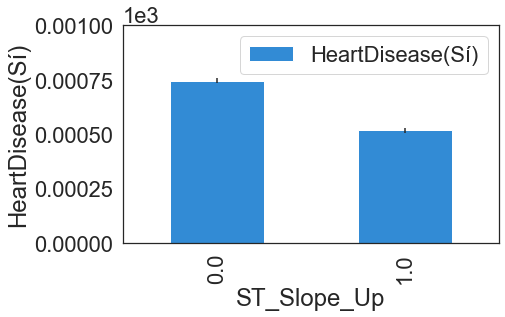

In [41]:
# Los gráficos PD también se pueden generar con la biblioteca SKATER
# Gráfico PD de 'ST_Slope_Up' que afecta a la predicción del modelo
r = interpreter.partial_dependence.plot_partial_dependence(['ST_Slope_Up'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=1000, 
                                                           with_variance=True, figsize = (6, 4), n_jobs=-1)
yl = r[0][1].set_ylim(0, 1)

2022-01-13 20:00:38,812 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[47/47] grid cells ████████████████████ Time elapsed: 5 seconds

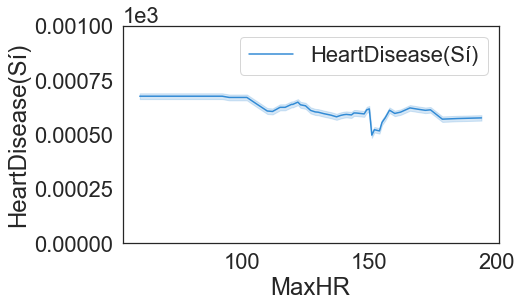

In [42]:
# Los gráficos PD también se pueden generar con la biblioteca SKATER
# Gráfico PD de 'MaxHR' que afecta a la predicción del modelo

r = interpreter.partial_dependence.plot_partial_dependence(['MaxHR'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=1000, 
                                                           with_variance=True, figsize = (6, 4), n_jobs=-1)
yl = r[0][1].set_ylim(0, 1)

### Gráfico PD bivariante que muestra las interacciones entre las características "Frecuencia Cardíaca Máxima Alcanzada" y "Edad" y su efecto en el "Resultado".

2022-01-13 19:02:13,907 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[3956/3956] grid cells ████████████████████ Time elapsed: 192 secondsWall time: 3min 13s


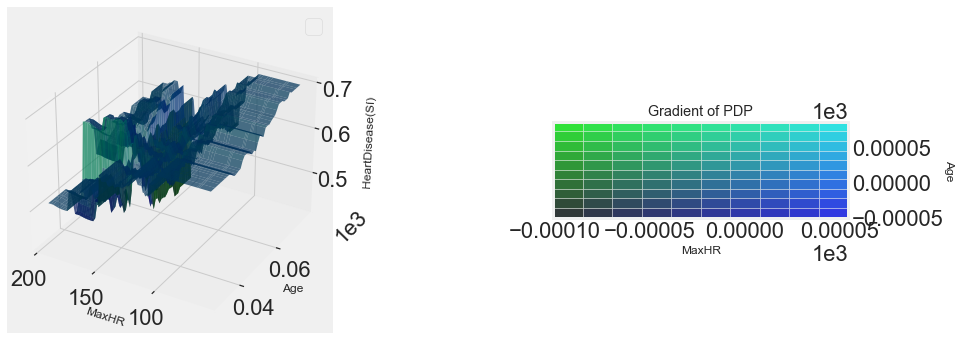

In [239]:
%%time
# beware : this process is computationally slow/heavy
plots_list = interpreter.partial_dependence.plot_partial_dependence([('MaxHR', 'Age')], 
                                                                    im_model, grid_range=(0,1), 
                                                                    n_samples=1000,
                                                                    figsize=(16, 6),
                                                                    grid_resolution=100,
                                                                    progressbar=True,
                                                                    n_jobs=-1)

> Aquí, si nos fijamos bien, podemos ver de nuevo el mismo efecto, podemos apreciar el efecto de la edad en conjunto con la frecuencia cardíaca máxima alcanzada en la predicción de enfermedades cardíacas.

### Interpretaciones locales con Skater
La interpretación local podría lograrse de dos maneras:

- En primer lugar, se podría aproximar el comportamiento de un modelo de predicción complejo en las proximidades de una única entrada utilizando un modelo auxiliar o sustituto sencillo e interpretable (por ejemplo, un regresor lineal).
- En segundo lugar, se podría utilizar el estimador base para comprender el comportamiento de una sola predicción utilizando funciones intuitivas aproximadas basadas en las entradas y salidas.

## Local Interpretable Model-Agnostic Explanations (LIME)

LIME es un algoritmo diseñado por Riberio Marco, Singh Sameer, Guestrin Carlos para acceder al comportamiento de cualquier estimador base (modelo) utilizando modelos sustitutos interpretables (por ejemplo, clasificador/regresor lineal).

Esta forma de evaluación global ayuda a generar explicaciones que son localmente fieles pero que pueden no alinearse con el comportamiento global.

Básicamente, las explicaciones LIME se basan en modelos sustitutos locales. Los modelos sustitutos son modelos interpretables (como un modelo lineal o un árbol de decisión) que se aprenden sobre las predicciones del modelo original de caja negra. Pero en lugar de intentar ajustar un modelo sustituto global, LIME se centra en ajustar modelos sustitutos locales para explicar por qué se hicieron predicciones individuales.

A continuación se presenta un flujo de trabajo estándar de alto nivel para esto:

- Elegir la instancia de interés para la que se desea tener una explicación de las predicciones del modelo de caja negra.
- Perturbar el conjunto de datos y obtener las predicciones de la caja negra para estos nuevos puntos.
- Ponderar las nuevas muestras por su proximidad a la instancia de interés.
- Ajustar un modelo ponderado e interpretable (sustituto) en el conjunto de datos con las variaciones.
- Explicar la predicción interpretando el modelo local.
- Recomendación: leer el capítulo de LIME en el excelente libro de Christoph Molnar sobre Interpretación de Modelos que habla de esto en detalle.

https://christophm.github.io/interpretable-ml-book/lime.html

#### Explicación de las predicciones del modelo con Skater usando LIME

Skater puede aprovechar LIME para explicar las predicciones del modelo. Normalmente, su clase LimeTabularExplainer ayuda a explicar las predicciones sobre datos tabulares (es decir, matriciales). Para las características numéricas, las perturba mediante el muestreo de una Normal(0,1) y la operación inversa de centrado y escalado de la media, según las medias y las estadísticas de los datos de entrenamiento. Para las características categóricas, las perturba mediante el muestreo de acuerdo con la distribución de entrenamiento, y haciendo una característica binaria que es 1 cuando el valor es el mismo que la instancia que se está explicando. La función explain_instance() genera explicaciones para una predicción. En primer lugar, generamos datos de vecindad perturbando aleatoriamente las características de la instancia. A continuación, aprendemos modelos lineales localmente ponderados (sustitutos) sobre estos datos de vecindad para explicar cada una de las clases de forma interpretable.

Dado que XGBoost tiene algunos problemas con el ordenamiento de los nombres de las características cuando se construyen modelos con marcos de datos, utilizaremos nuestro modelo xgb_array, aún ajustado, para que LIME funcione sin problemas adicionales de reordenamiento de características.

In [32]:
predictions = xgb_array.predict_proba(X_test.values)

In [33]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(X_test.values, feature_names=features_list, discretize_continuous=True, class_names=['HeartDisease(No)', 'HeartDisease(Sí)'])

##### Predicción cuando una observación es = 0 (HeartDisease (No))

In [34]:
heart_failure_nb = 1
print('Reference:', y_test.iloc[heart_failure_nb])
print('Predicted:', predictions[heart_failure_nb])
exp.explain_instance(X_test.iloc[heart_failure_nb].values, xgb_array.predict_proba).show_in_notebook()

Reference: 0
Predicted: [0.3529744 0.6470256]


> Podemos ver que este modelo ha tomado esta decisión en particular (35% de probabilidades de que este paciente sea calificado como de "baja probabilidad de tener enfermedades cardíacas") al plantear las características de "ST_Slope_Up ", "ChestPainType_ATA", "Oldpeak" podríamos saber en qué grado mirando los valores asociados.

##### Predicción cuando una observación es = 1 (HeartDisease (Sí))

In [35]:
heart_failure_nb = 3
print('Reference:', y_test.iloc[heart_failure_nb])
print('Predicted:', predictions[heart_failure_nb])
exp.explain_instance(X_test.iloc[heart_failure_nb].values, xgb_array.predict_proba).show_in_notebook()

Reference: 1
Predicted: [0.0094676 0.9905324]


> Podemos ver de nuevo que SKATER LIME ofrece una buena visualización que muestra qué características fueron las más influyentes para que el modelo tomara la decisión correcta de predecir el diagnóstico como insuficiencia del corazón.

## Interpretación del modelo con SHAP

Los valores de SHAP pueden explicar la salida de cualquier modelo de aprendizaje automático, pero para los modelos de conjunto complejos puede ser lento. SHAP tiene implementaciones en C++ que soportan los modelos de árbol XGBoost, LightGBM, CatBoost y scikit-learn.

SHAP (SHapley Additive exPlanations) asigna a cada característica un valor de importancia para una predicción concreta. Sus componentes novedosos incluyen: la identificación de una nueva clase de medidas de importancia de características aditivas, y resultados teóricos que muestran que hay una solución única en esta clase con un conjunto de propiedades deseables. Normalmente, los valores SHAP tratan de explicar la salida de un modelo (función) como una suma de los efectos de cada característica que se introduce en una expectativa condicional. En el caso de las funciones no lineales, es importante el orden en el que se introducen las características. Los valores SHAP son el resultado de la media de todos los ordenamientos posibles. Las pruebas de la teoría de juegos demuestran que éste es el único enfoque coherente posible.

Una forma intuitiva de entender el valor Shapley es la siguiente: Los valores de las características entran en una habitación en orden aleatorio. Todos los valores de características de la sala participan en el juego (= contribuyen a la predicción). El valor de Shapley ϕ𝑖𝑗 es la contribución marginal media del valor del rasgo 𝑥𝑖𝑗 uniendo los rasgos que ya han entrado en la sala antes.

### Explicar las predicciones con SHAP

El valor de Shapley es la contribución media de las características que predicen en diferentes situaciones.

SHAP proporciona múltiples explicadores para diferentes tipos de modelos.

- Explicador de árbol: Soporta modelos XGBoost, LightGBM, CatBoost y scikit-learn mediante Tree SHAP.
- DeepExplainer (DEEP SHAP): Soporta modelos TensorFlow y Keras usando valores DeepLIFT y Shapley.
- GradientExplainer: Soporta modelos TensorFlow y Keras.
- KernelExplainer (Kernel SHAP): Aplicar a cualquier modelo mediante el uso de LIME y los valores de Shapley.

Para más información sobre las explicaciones de los valores de Shapley consulta el capítulo del libro de Christoph Molnar sobre los valores de Shapley https://christophm.github.io/interpretable-ml-book/shapley.html

Así que vamos a jugar con la implementación de Tree SHAP integrada en XGBoost para explicar el conjunto de datos de prueba.

In [36]:
# pip install shap
import shap

# load JS visualization code to notebook
shap.initjs()

In [37]:
# explicar las predicciones del modelo utilizando los valores SHAP
# (la misma sintaxis funciona para los modelos LightGBM, CatBoost y scikit-learn)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

In [38]:
X_shap = pd.DataFrame(shap_values)
X_shap.tail()

0         1         2         3         4         5         6   \
225 -0.059643  0.367388 -0.448481  0.965732 -0.291521  1.177707  0.740993   
226 -0.628498  0.621073 -0.598090  0.871459 -0.095908 -0.013922 -0.332170   
227  0.296796  0.243594  0.568154 -0.248102 -0.157412  1.134898  0.464240   
228  0.068234  0.315755  0.082630  0.409131  1.393124 -0.503892 -0.329922   
229 -0.024689  0.306942  0.829553 -1.061979 -0.216107  1.206264  0.761902   

           7         8         9         10        11        12        13  \
225  0.486376  0.391994  0.206664  0.051651  0.297046 -0.531425 -0.730911   
226 -0.301231 -2.302017  0.190692  0.021950 -0.429644  0.053266 -0.963124   
227  1.675918  0.293960 -0.820732  0.047053  0.161091  0.176592  0.509016   
228  2.732209  0.150511 -1.219664  0.028109 -0.320637  0.127535 -0.259802   
229  0.883337  0.257782  0.267768  0.092587 -0.221169  0.144262  0.452480   

           14  
225  1.792172  
226 -1.862589  
227  1.570444  
228 -1.740903  
229  0.858264

> Obtenemos una matriz de valores SHAP con la misma forma que el conjunto X_test original. Cada fila suma la diferencia entre el resultado del modelo para esa muestra y el valor esperado del resultado del modelo (que se almacena como atributo expected_value del explicador). Normalmente, esta diferencia nos ayuda a explicar por qué el modelo se inclina en la predicción de un resultado de clase específico.

In [39]:
print('Expected Value: ', explainer.expected_value)

Expected Value:  0.23353574


### Importancia de las características con SHAP

Básicamente, se toma la media de las magnitudes de los valores SHAP en el conjunto de datos y se traza como un simple gráfico de barras.

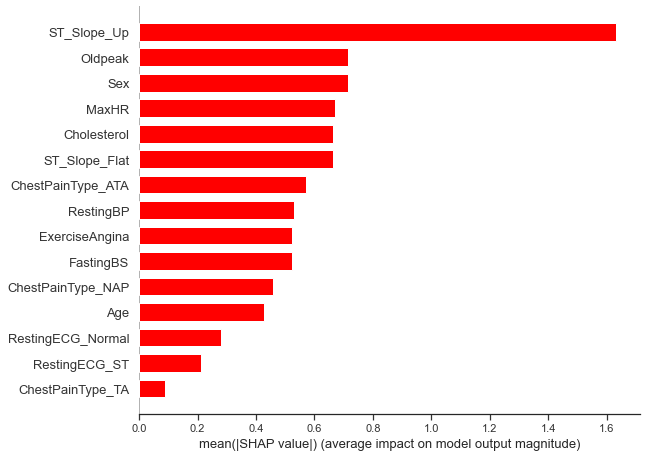

In [40]:
shap.summary_plot(shap_values, X_test, plot_type="bar", color='red')

#### Predicción cuando una observación es = 0 (HeartDisease (No)

In [41]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])

#### Predicción cuando una observación es = 1 (HeartDisease (Sí))

In [42]:
shap.force_plot(explainer.expected_value, shap_values[3,:], X_test.iloc[3,:])

#### SHAP Summary Plot

Un valor SHAP para una característica de una predicción específica representa cuánto cambia la predicción del modelo cuando observamos esa característica.

El SHAP también nos permite utilizar un gráfico de dispersión de densidad de los valores SHAP para cada característica para identificar el impacto que tiene cada característica en el resultado del modelo para los individuos del conjunto de datos. Las características se clasifican por la suma de las magnitudes de los valores SHAP en todas las muestras.

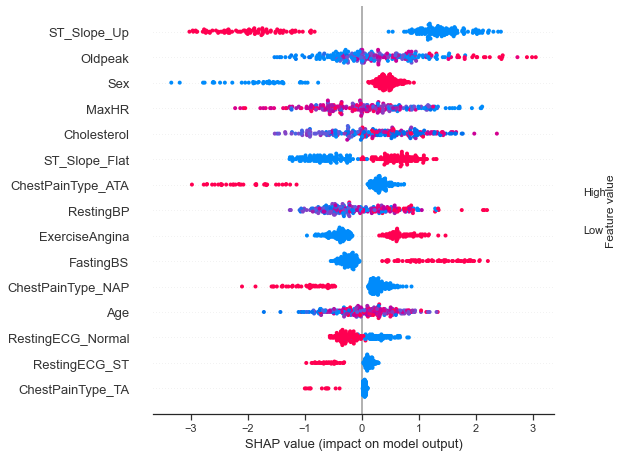

In [43]:
shap.summary_plot(shap_values, X_test)

> Es interesante confirmar de nuevo que los valores de "ST_Slope_Up " desempeñan un papel importante y positivo en la predicción final, y que los valores elevados de "Oldpeak" parecen tener un impacto negativo en la predicción de diagnóstico de enfermedades del corazón.

#### SHAP Gráficos de dependencia

Podemos utilizar el método dependence_plot para trazar el efecto de una característica en la predicción con o sin la influencia de otra característica. Si no da ningún parámetro interaction_index, SHAP decidirá por sí mismo y propondrá automáticamente una característica de interacción.

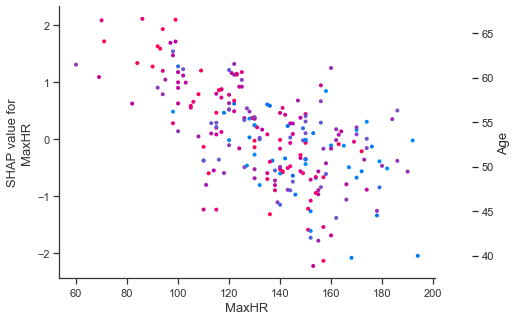

In [44]:
shap.dependence_plot(ind='MaxHR', interaction_index='Age',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

## FairML

FairML es una biblioteca de Python que audita modelos predictivos de caja negra. La idea básica de FairML (y de muchos otros intentos de auditar o interpretar el comportamiento de los modelos) es medir la dependencia de un modelo de sus entradas cambiándolas. Si un pequeño cambio en una característica de entrada cambia drásticamente la salida, el modelo es sensible a la característica.

¿Pero qué ocurre si los atributos de entrada están correlacionados?

El truco utilizado aquí para contrarrestar esta multicolinealidad es la proyección ortogonal. FairML proyecta ortogonalmente la entrada para medir la dependencia del modelo predictivo de cada atributo. La proyección ortogonal de los vectores es importante porque nos permite eliminar completamente la dependencia lineal entre los atributos. Si dos vectores son ortogonales entre sí, ninguna transformación lineal de un vector puede producir el otro. Esta intuición es la base de la medida de dependencia de las características.

Una ventaja de FairML es que puede auditar cualquier clasificador o regresor. FairML sólo requiere que tenga una función de predicción.

https://github.com/adebayoj/fairml

In [45]:
# pip install https://github.com/adebayoj/fairml/archive/master.zip

from fairml import audit_model
from fairml import plot_dependencies

In [46]:
%%time

xgb_fair = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)

xgb_fair.fit(X_train.values, y_train, eval_metric = 'logloss')

Wall time: 280 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=33,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Ahora, importamos los dos métodos clave de fairml. audit_model toma:

- (requerido) la función black-box, que es el modelo a auditar

- (requerido) sample_data para ser perturbado para consultar la función. Tiene que ser un dataframe de pandas sin datos perdidos.

- otros parámetros opcionales que controlan la mecánica del proceso de auditoría, por ejemplo:

    - number_of_runs : número de iteraciones a realizar
    - interacciones : bandera para permitir la comprobación de la dependencia del modelo en las interacciones.

audit_model devuelve un diccionario sobrecargado donde las claves son los nombres de las columnas del dataframe de pandas de entrada y los valores son listas que contienen la dependencia del modelo en esa característica en particular. Estas listas de tamaño number_of_runs.

In [47]:
%%time

# call audit model
feat_importances, _ = audit_model(xgb_fair.predict, X_train, distance_metric='accuracy', direct_input_pertubation_strategy='constant-zero',
                                 number_of_runs=50, include_interactions=True)

# print feature importance
print(feat_importances)

Feature: Age,	 Importance: 0.8226744186046512
Feature: Sex,	 Importance: 0.8343023255813954
Feature: RestingBP,	 Importance: 0.8357558139534884
Feature: Cholesterol,	 Importance: 0.813953488372093
Feature: FastingBS,	 Importance: 0.8343023255813954
Feature: MaxHR,	 Importance: -0.8372093023255814
Feature: ExerciseAngina,	 Importance: 0.7572674418604651
Feature: Oldpeak,	 Importance: 0.7630813953488372
Feature: ChestPainType_ATA,	 Importance: -0.9651162790697675
Feature: ChestPainType_NAP,	 Importance: -0.9520348837209303
Feature: ChestPainType_TA,	 Importance: 0.9912790697674418
Feature: RestingECG_Normal,	 Importance: -0.9316860465116279
Feature: RestingECG_ST,	 Importance: 0.9723837209302325
Feature: ST_Slope_Flat,	 Importance: 0.7252906976744186
Feature: ST_Slope_Up,	 Importance: -0.9171511627906976
Wall time: 10.4 s


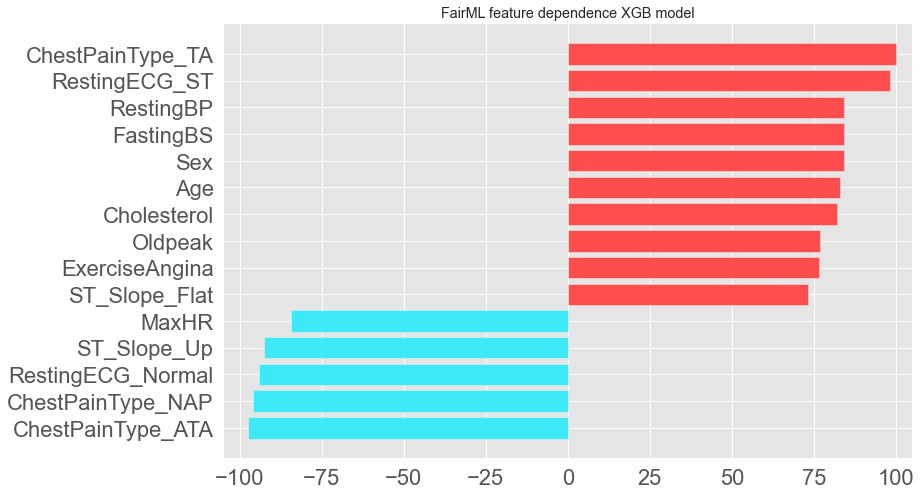

In [48]:
# generar un gráfico de dependencia de características
fig = plot_dependencies(
    feat_importances.median(),
    reverse_values=False,
    title="FairML feature dependence XGB model",
    fig_size=(11,8)
    )

# Imprimir a fichero
#file_name = "img/fairml_heart_failure.png"
#plt.savefig(file_name, transparent=False, bbox_inches='tight', dpi=250)

El color rojo indica que el factor contribuye en gran medida a la predicción del modelo.

Puedes jugar con los diferentes parámetros como la bandera include_interactions o con direct_input_pertubation_strategy refiriéndose a cómo poner a cero una sola variable con tres opciones diferentes:

- 'constant-zero': reemplazar con un valor constante aleatorio
- 'constant-median': reemplaza con un valor constante mediano
- 'random-sample': reemplaza todos los valores con una permutación aleatoria de la columna